# Лабораторная работа №3
**Вариант 12**

## Часть 1. Простая линейная регрессия

---
Подключение библиотек

In [228]:
import pandas as pd
import numpy as np

---
Импорт данных

Так как в книге Excel всего 10 вариантов, был взят вариант 2, который соответствует 12-му варианту по списку группы.

In [229]:
df = pd.read_excel('./regression.xlsx', sheet_name="var2")

In [230]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,0.000035,0.000053,-0.034690
std,1.155251,1.155283,1.821831
min,-1.999659,-1.996859,-5.545098
25%,-0.999109,-0.999551,-1.301847
50%,-0.001946,0.000590,-0.102481
75%,0.999229,0.998060,1.201828
max,1.997064,1.998357,5.657517


---
Обучение первой модели

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['y']
X = df['x1']

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

model = LinearRegression()

model.fit(np.array(X_train).reshape(-1,1), y_train)

predictions_valid = model.predict(np.array(X_valid).reshape(-1,1))

---
Сравнение и рассчёт показателей

In [232]:
from sklearn import metrics

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
display(df_match)
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predictions_valid):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predictions_valid):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predictions_valid):.4f}')

,Actual,Predicted
0,0.152676,0.490161
1,-0.827937,1.065507
2,0.690686,-0.340977
3,0.462547,-1.242442
4,2.333668,0.277581
...,...,...
245,-1.175851,0.176011
246,-1.047909,-0.991022
247,-2.773939,-1.177863
248,-1.239638,-1.609779


Mean Absolute Error: 1.1894
Mean Squared Error: 1.9457
Root Mean Squared Error: 1.3949
R2 metric: 0.4166


---
Визуализация

a: 1.0357
b: -0.0863


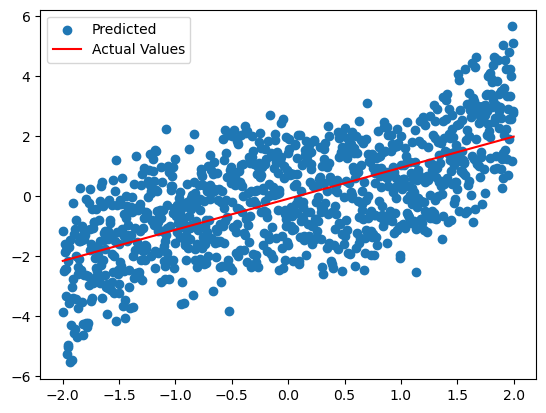

In [233]:
import matplotlib.pyplot as plt
# получение коэффициента регрессии
a = model.coef_
b = model.intercept_

print(f'a: {a[0]:.4f}\nb: {b:.4f}')

plt.scatter(df['x1'], df['y'], label="Predicted") # зависимость целевого столбца от конкретного столбца х1 (точечный график)
# т.к. линейная регрессия – линия, можно использовать формулу y=ax+b:
plt.plot([-2, 2], [a*(-2) + b, a*2 + b], "r", label="Actual Values")
plt.legend()

Построим график с истинными предсказаниями в виде красной линии под углом 45 градусов

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


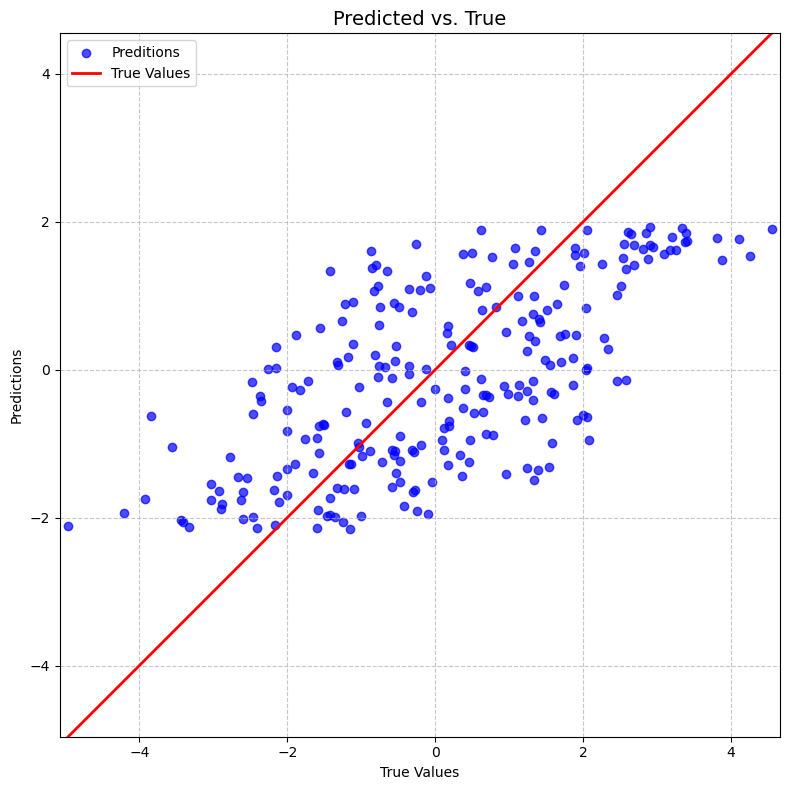

In [234]:
def pred_vs_true(predictions, true_values):

	plt.figure(figsize=(8, 8))

	plt.scatter(true_values, predictions, alpha=0.7, color='blue', label='Preditions')

	min_val = min(min(true_values), min(predictions))
	max_val = max(max(true_values), max(predictions))
	plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='True Values')

	plt.xlabel('True Values')
	plt.ylabel('Predictions')
	plt.title('Predicted vs. True', fontsize=14)

	plt.legend()

	plt.grid(True, linestyle='--', alpha=0.7)

	plt.axis('equal')
	plt.xlim([min_val, max_val])
	plt.ylim([min_val, max_val])

	plt.tight_layout()
	plt.show()

pred_vs_true(predictions_valid, y_valid)

Построим график с разницей предсказанного и истинного значения

<Axes: >

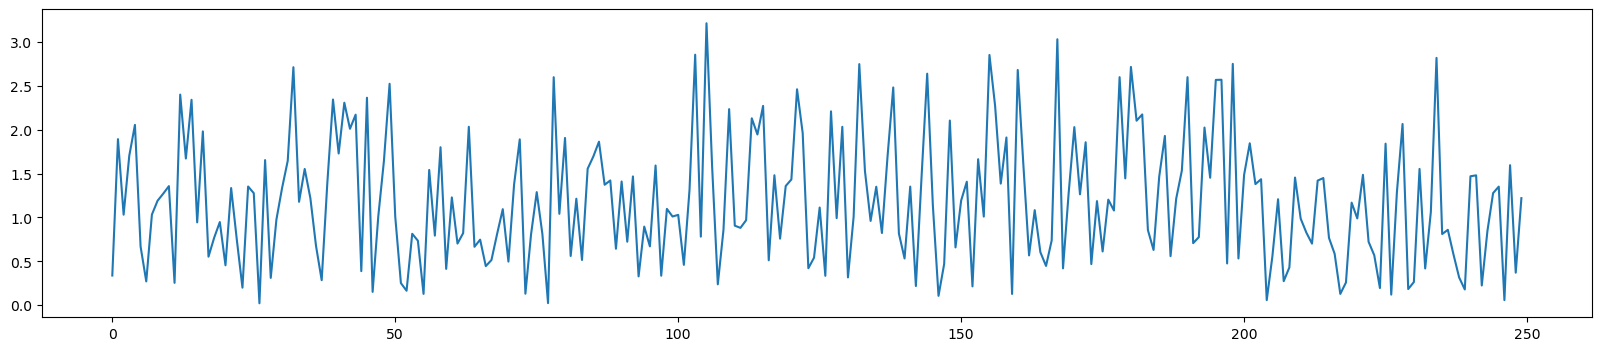

In [235]:
import seaborn as sns

diff = abs(df_match['Actual'] - df_match['Predicted'])

fig, axes = plt.subplots(
	1,
	1,
	figsize=(20, 4)
)

sns.lineplot(diff, ax=axes)

---
Повторим процесс для столбца x2 

In [236]:
y = df['y']
X = df['x2']

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

model = LinearRegression()

model.fit(np.array(X_train).reshape(-1,1), y_train)

predictions_valid = model.predict(np.array(X_valid).reshape(-1,1))

In [237]:
df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
display(df_match)

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predictions_valid):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predictions_valid):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predictions_valid):.4f}')

,Actual,Predicted
0,0.152676,-0.162613
1,-0.827937,-1.158129
2,0.690686,0.070009
3,0.462547,-0.087397
4,2.333668,1.839481
...,...,...
245,-1.175851,-1.467820
246,-1.047909,0.368170
247,-2.773939,-1.813066
248,-1.239638,-0.324080


Mean Absolute Error: 1.1201
Mean Squared Error: 2.1225
Root Mean Squared Error: 1.4569
R2 metric: 0.3635


a: -0.9520
b: -0.0455


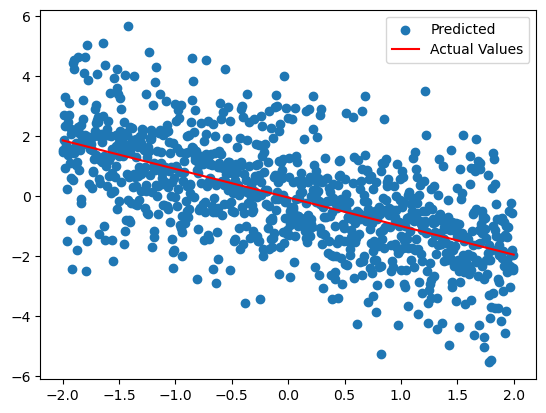

In [238]:
# получение коэффициента регрессии
a = model.coef_
b = model.intercept_

print(f'a: {a[0]:.4f}\nb: {b:.4f}')

plt.scatter(df['x2'], df['y'], label="Predicted") # зависимость целевого столбца от конкретного столбца х1 (точечный график)
# т.к. линейная регрессия – линия, можно использовать формулу y=ax+b:
plt.plot([-2, 2], [a*(-2) + b, a*2 + b], "r", label="Actual Values")
plt.legend()

Построим график с истинными предсказаниями в виде красной линии под углом 45 градусов

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


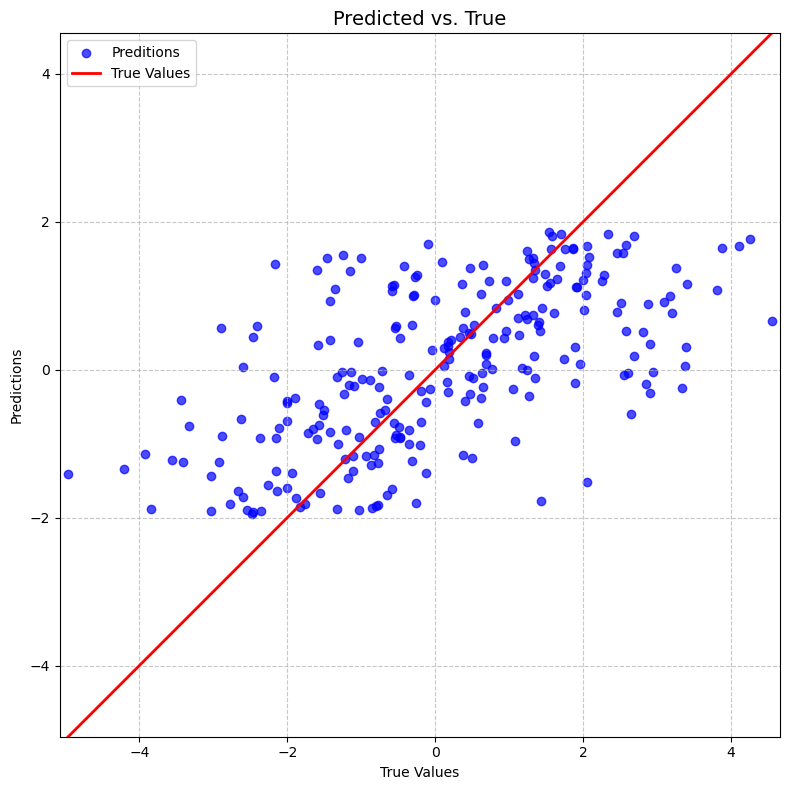

In [239]:
pred_vs_true(predictions_valid, y_valid)

Построим график с разницей предсказанного и истинного значения

<Axes: >

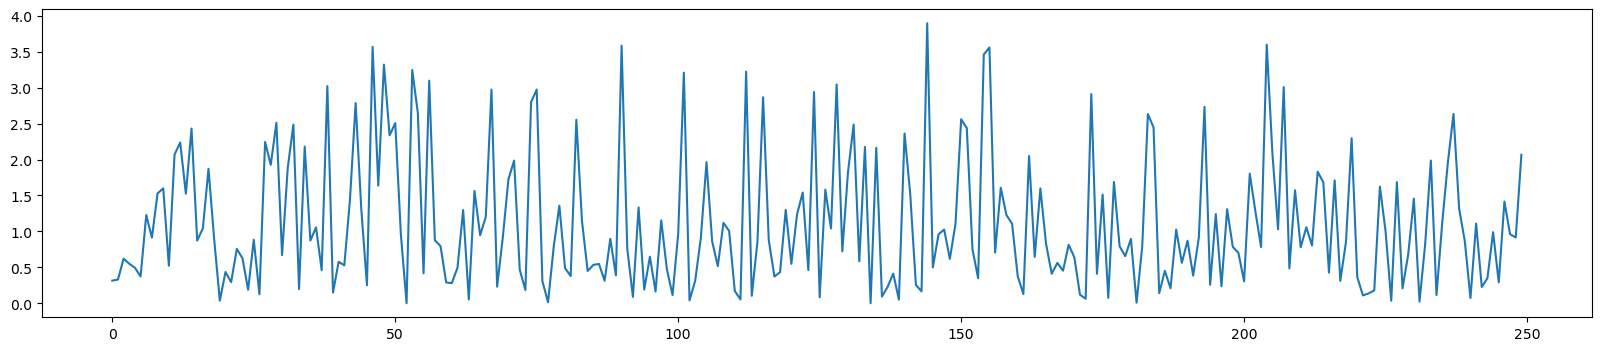

In [240]:
import seaborn as sns

diff = abs(df_match['Actual'] - df_match['Predicted'])

fig, axes = plt.subplots(
	1,
	1,
	figsize=(20, 4)
)

sns.lineplot(diff, ax=axes)

---
Выводы
---

Линейная регрессия лучше подходит для обучения модели на столбце `x1`, так как значение `R2: 0.42 > 0.36` 

---
## Часть 2. Полиноминальная регрессия

Для обучения модели на основе полиномиальной регрессии был выбран столбец `x1`, распределение которого на графике похоже на полином некоторой степени.

Intercept: -0.12613465653450334
Coefficients: [0.         0.17441786 0.03583988 0.36203715]


,Actual,Predicted
0,0.152676,0.044503
1,-0.827937,0.610240
2,0.690686,-0.172234
3,0.462547,-0.779787
4,2.333668,-0.044714
...,...,...
245,-1.175851,-0.073768
246,-1.047909,-0.492468
247,-2.773939,-0.693994
248,-1.239638,-1.457491


/home/tushonka/.conda/envs/dsfs/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


MAE: 1.1325
R2: 0.4623


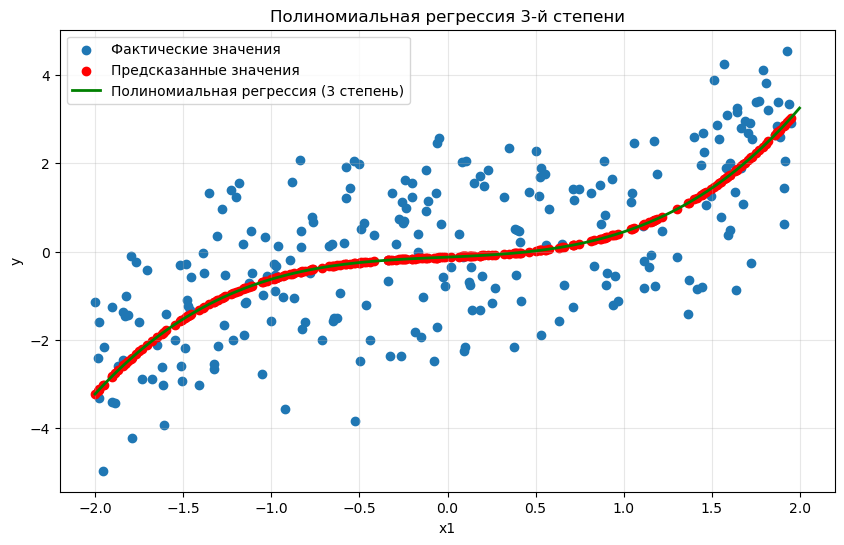

In [241]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

def poly(degree):
    y = df['y']
    X = df['x1']

    X_train,X_valid,y_train,y_valid = train_test_split(
        X, y,
        test_size=0.25,
        random_state=0
    )

    poly_features = PolynomialFeatures(degree)
    X_train_poly = poly_features.fit_transform(pd.DataFrame(X_train))

    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    print(f'Intercept: {lin_reg.intercept_}')
    print(f'Coefficients: {lin_reg.coef_}')

    X_valid_poly = poly_features.fit_transform(pd.DataFrame(X_valid))
    predictions_valid = lin_reg.predict(X_valid_poly)

    df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
    display(df_match)

    # metrics
    print(f"MAE: {mean_absolute_error(y_valid, predictions_valid):.4f}")
    print(f"R2: {r2_score(y_valid, predictions_valid):.4f}")

    # plot
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_range_pred = lin_reg.predict(x_range_poly)

    plt.figure(figsize=(10, 6))

    plt.scatter(X_valid, y_valid, label='Фактические значения')
    plt.scatter(X_valid, predictions_valid, color='red', label='Предсказанные значения')
    plt.plot(x_range, y_range_pred, color='green', linewidth=2, label=f'Полиномиальная регрессия ({degree} степень)')

    plt.xlabel('x1')
    plt.ylabel('y')
    plt.title(f'Полиномиальная регрессия {degree}-й степени')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

poly(3)

Повторим действия для степени полинома 4.

Intercept: -0.05988722067191332
Coefficients: [ 0.          0.17908102 -0.12711733  0.35985145  0.0474574 ]


,Actual,Predicted
0,0.152676,0.067033
1,-0.827937,0.549709
2,0.690686,-0.116778
3,0.462547,-0.845077
4,2.333668,0.003680
...,...,...
245,-1.175851,-0.016636
246,-1.047909,-0.525551
247,-2.773939,-0.752558
248,-1.239638,-1.521556


MAE: 1.1294
R2: 0.4652


/home/tushonka/.conda/envs/dsfs/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


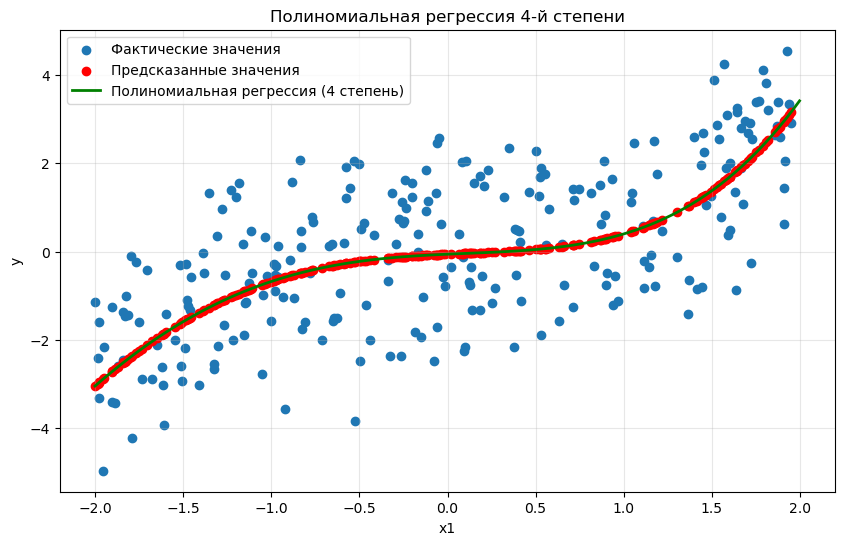

In [242]:
poly(4)

---
Выводы
---

Метод полиномиальной регрессии третьей степени оказался более эффективным по сравнению с линейной регрессией.

`R2: 0.46 > 0.42`

При этом четвёртая степень полинома показала лучшие результаты (начиная с 5-ой показатель `R2` снижается):

`R2: 0.47 > 0.46`

При слишком низкой степени полинома (1-2) модель недообучена - не учитывается нелинейность данных.

При слишком высокой степени (10 и выше) модель переобучена - подстраивается под шум данных и плохо работает на тестовой выборке   

---
## Часть 3. Решение задачи регрессии различными методами

In [243]:
df = pd.read_csv("salary.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


In [244]:
df.describe()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,salary
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.732000,50493.562171,19.479333,74.649867,49.046000,10.169171,19920.723043,7656.749308,98573.093521
std,15.071771,15354.495706,11.471529,9.904426,17.053654,10.003094,13635.530107,5481.390395,111786.756001
min,18.000000,-826.421240,0.000000,41.604998,20.000000,0.018137,408.482014,4.367130,28588.984258
25%,31.000000,40525.989722,10.000000,67.776127,34.000000,3.022163,9418.707911,3138.484219,69582.654903
50%,44.000000,50784.690569,19.000000,74.701567,49.000000,7.105165,17114.512522,6786.703775,80310.412797
75%,56.000000,61104.997961,29.000000,81.635633,63.000000,14.392065,27766.214001,11008.309571,91637.052601
max,69.000000,98819.709397,39.000000,107.261317,79.000000,82.597342,101890.570518,27276.705593,985625.114794


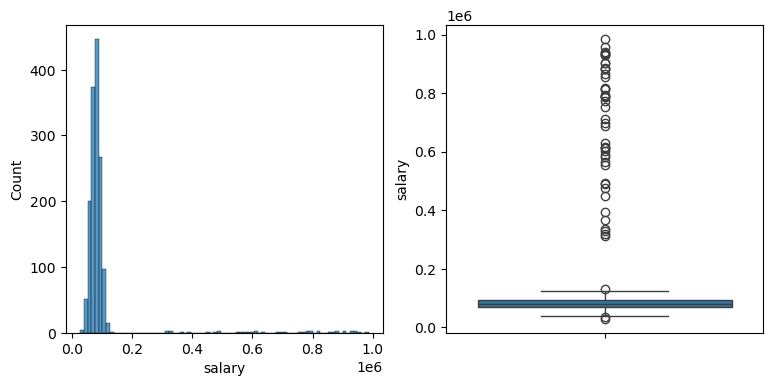

In [245]:
import seaborn as sns

def draw_data(data):
    fig, axes = plt.subplots(
        1,
        2,
        figsize=(9, 4)
    )

    sns.histplot(data=data, bins='auto', ax=axes[0])
    sns.boxplot(data=data, ax=axes[1])

draw_data(df.salary)

На графике видно значительное число выбросов, которые стоит обработать. 

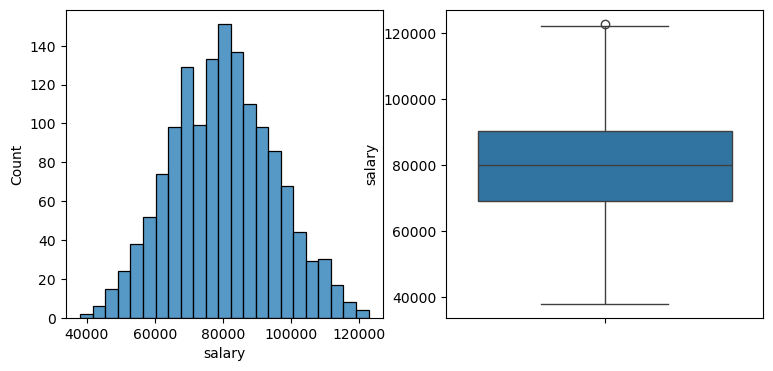

In [246]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(df.salary)

df.salary = df.salary[~outliers]
draw_data(df.salary)

Построим матрицу диаграм рассеяния по всем числовым значениям

In [ ]:
sns.pairplot(df)

Заполним пропуски в столбце `salary` нулями

In [ ]:
df = df.fillna(0)

Выполним обучение модели линейной регрессии, предварительно масштабировав методом `StandardScaler`

,Actual,Predicted
0,48262.103163,46461.514794
1,83196.215231,78983.301565
2,76384.964261,69705.465775
3,79451.011331,84026.868917
4,88054.579652,85210.257380
...,...,...
370,70061.210178,71277.942759
371,113672.108989,95888.320556
372,75683.108135,73820.360793
373,100968.830571,97757.263134


<Axes: >

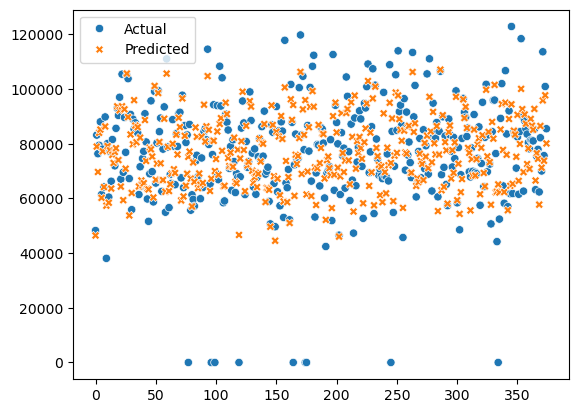

In [ ]:
y = df['salary']
X = df.drop('salary', axis=1).select_dtypes([np.number])

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
predictions_valid = model.predict(X_valid_scaled)

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid }).reset_index(drop=True)
display(df_match)

sns.scatterplot(df_match)

In [ ]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predictions_valid):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predictions_valid):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predictions_valid):.4f}')

Mean Absolute Error: 8059.6594
Mean Squared Error: 193948047.2791
Root Mean Squared Error: 13926.5232
R2 metric: 0.4894


In [ ]:
coefficients_df = pd.DataFrame({
    'feature': X.columns.tolist(),  # названия признаков
    'coefficient': model.coef_      # коэффициенты модели
})

# Сортируем по абсолютному значению коэффициентов для оценки важности
coefficients_df['abs_coefficient'] = np.abs(coefficients_df['coefficient'])
coefficients_df = coefficients_df.sort_values('abs_coefficient', ascending=False).reset_index(drop=True)

print("Коэффициенты признаков:")
display(coefficients_df)

Коэффициенты признаков:


,feature,coefficient,abs_coefficient
0,experience,9542.342196,9542.342196
1,income,7423.116837,7423.116837
2,score_test,955.182784,955.182784
3,debt,-768.172579,768.172579
4,hours_worked,311.909375,311.909375
5,distance_to_work,-213.479399,213.479399
6,savings,29.072008,29.072008
7,age,22.425164,22.425164


<BarContainer object of 8 artists>

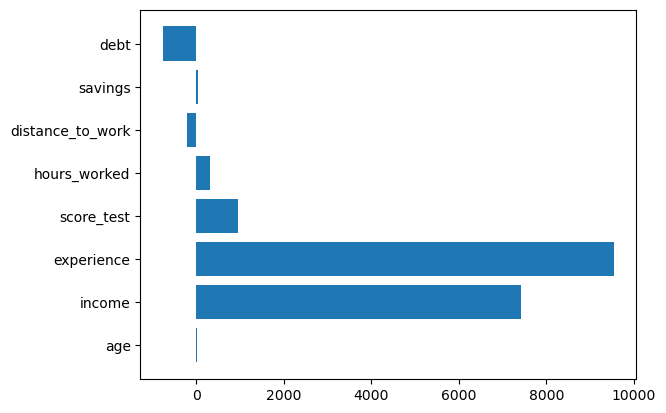

In [ ]:
pd.DataFrame({"Feature":X.columns.to_list(),"Coefficients":model.coef_.flatten().T})
plt.barh(X.columns.to_list(), model.coef_.flatten())

На графике видно, что наибольшую значимость с большим отрывом имеют критерии `experience` и `income`

Выполним обучение модели по методу k-ближайших соседей. Подберём значение k = 20.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

y = df['salary']
X = df.drop('salary', axis=1).select_dtypes([np.number])

X_train,X_valid,y_train,y_valid = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0
)

model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)

predicted = model.predict(X_valid)

df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predicted }).reset_index(drop=True)
display(df_match)

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_valid, predicted):.4f}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_valid, predicted):.4f}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_valid, predicted)):.4f}')
print(f'R2 metric: {metrics.r2_score(y_valid, predicted):.4f}')

,Actual,Predicted
0,48262.103163,69605.346061
1,83196.215231,76435.945324
2,76384.964261,76191.335691
3,79451.011331,81270.058996
4,88054.579652,77875.807162
...,...,...
370,70061.210178,69219.374637
371,113672.108989,83163.405652
372,75683.108135,81998.747631
373,100968.830571,82366.768099


Mean Absolute Error: 13165.8197
Mean Squared Error: 331981155.6860
Root Mean Squared Error: 18220.3500
R2 metric: 0.1260


Выполним визуализацию для сравнения предсказанных значений

,Actual,Linear Regression,K-Neighbors Regression
0,48262.103163,46461.514794,69605.346061
1,83196.215231,78983.301565,76435.945324
2,76384.964261,69705.465775,76191.335691
3,79451.011331,84026.868917,81270.058996
4,88054.579652,85210.257380,77875.807162
...,...,...,...
370,70061.210178,71277.942759,69219.374637
371,113672.108989,95888.320556,83163.405652
372,75683.108135,73820.360793,81998.747631
373,100968.830571,97757.263134,82366.768099


<Axes: >

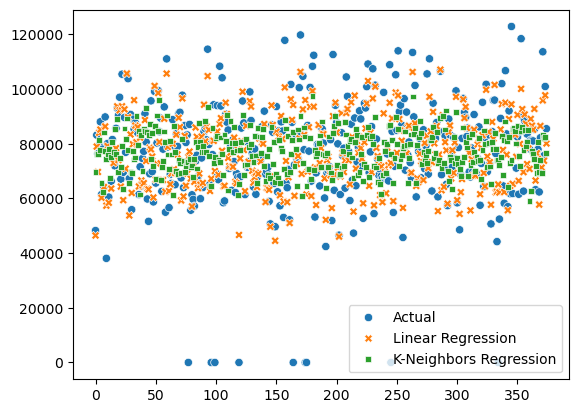

In [ ]:
df_match = pd.DataFrame({'Actual': y_valid, 'Linear Regression': predictions_valid, 'K-Neighbors Regression': predicted }).reset_index(drop=True)
display(df_match)

sns.scatterplot(df_match)

На графике видно, что значения, полученные с помощью Linear Regression, ближе к фактическим. Это также подтверждается значениями `R2`:

`0.49 > 0.13`

---
Выводы
---

В ходе выполнения лабораторной работы были получены навыки обучений моделей машинного обучения методами линейной регрессии, полиномиальной регрессии, а также методом k-ближайших соседей.

Было выполнено обучение моделей на различных входных данных, вычислены метрики, пострены графики, проведено сравнение различных методов.

Для датасета с параметрами `x1` и `x2` были определены оптимальные методы обучения:
- Для `x1`: Полиномимиальная регрессия третьей степени
- Для `x2`: Линейная регрессия

Метрики `R2` для `x1` и `x2`: `0.46` и `0.36` соответственно. 

Для датасета с множественными параметрами `salary.csv` были определены наиболее значимые. Было предсказано значение зарплаты на основе таких числовых параметров, как опыт работы, доход, возраст и др.

Метрика `R2` = `0.49` для линейной регрессии и `0.13` для метода k-ближайших соседей.